<!-- @q -->
## Problem 1 

Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns:

In [22]:
# Your code here
import pandas as pd

df= pd.read_csv("data/2019_Yellow_Taxi_Trip_Data.csv")
df[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe()


,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


<!-- @q -->
## Problem 2

Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`):

In [24]:
# Your code here
trip = df.sort_values('trip_distance', ascending=False).head(1)[
    ['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']
]
trip

,fare_amount,tip_amount,tolls_amount,total_amount
8338,176.0,18.29,6.12,201.21


<!-- @q -->
## Problem 3 

Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [25]:
# Your code here
df = pd.read_csv("data/Meteorite_Landings.csv")

df= df.rename(columns={'mass (g)': 'mass'}).drop(['reclat','reclong','GeoLocation'],axis=1).sort_values('mass',ascending=False)

df



,name,id,nametype,recclass,mass,fall,year
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM
...,...,...,...,...,...,...,...
38282,Wei-hui-fu (a),24231,Valid,Iron,NaN,Found,01/01/1931 12:00:00 AM
38283,Wei-hui-fu (b),24232,Valid,Iron,NaN,Found,01/01/1931 12:00:00 AM
38285,Weiyuan,24233,Valid,Mesosiderite,NaN,Found,01/01/1978 12:00:00 AM
41472,Yamato 792768,28117,Valid,CM2,NaN,Found,01/01/1979 12:00:00 AM


<!-- @q -->
## Problem 4

Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

**Hint 1**: Use `year.str.slice()` to grab a substring.

**Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

In [26]:
# Your code here
import pandas as pd
df = pd.read_csv("data/Meteorite_Landings.csv")
df["year"] = df["year"].astype(str).str.slice(6, 10)
df["year"] =pd.to_numeric(df["year"])
df["before_1970"] = df["year"] < 1970
df= df.set_index("id")
df= df.sort_index()
set = df.loc[10036:10040]
set

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,before_1970
id,,,,,,,,,,
10036,Enigma,Valid,H4,94.0,Found,1967.0,31.33333,-82.31667,"(31.33333, -82.31667)",True
10037,Enon,Valid,"Iron, ungrouped",763.0,Found,1883.0,39.86667,-83.95000,"(39.86667, -83.95)",True
10038,Enshi,Valid,H5,8000.0,Fell,1974.0,30.30000,109.50000,"(30.3, 109.5)",False
10039,Ensisheim,Valid,LL6,127000.0,Fell,1491.0,47.86667,7.35000,"(47.86667, 7.35)",True


**BONUS**: There's a data entry error in the `year` column. Can you find it?

In [6]:
# Your code here
import pandas as pd
df = pd.read_csv("data/Meteorite_Landings.csv")


There's a meteorite that was reportedly found in the future:

In [7]:

import pandas as pd
df = pd.read_csv("data/Meteorite_Landings.csv")
df["year"] = pd.to_datetime(df["year"], errors="coerce").dt.year
import datetime
current_year = datetime.datetime.now().year
future_entries = df[df["year"] > current_year]
future_entries



/tmp/ipykernel_2320/1641576758.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["year"] = pd.to_datetime(df["year"], errors="coerce").dt.year


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
30682,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2101.0,0.0,0.0,"(0.0, 0.0)"


_This meteorite actually was found in 2010 (more information [here](https://www.lpi.usra.edu/meteor/metbull.php?code=57150))._

<!-- @q -->
## Problem 5

Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [8]:
# Your code here
df= pd.read_csv("data/2019_Yellow_Taxi_Trip_Data.csv", parse_dates=True, index_col= 'tpep_dropoff_datetime')
df.resample('H')[['trip_distance', 'fare_amount', 'tolls_amount', 'tip_amount']].sum().sort_values('tip_amount',ascending=False).head(5)


/tmp/ipykernel_2320/1166068158.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.resample('H')[['trip_distance', 'fare_amount', 'tolls_amount', 'tip_amount']].sum().sort_values('tip_amount',ascending=False).head(5)


,trip_distance,fare_amount,tolls_amount,tip_amount
tpep_dropoff_datetime,,,,
2019-10-23 16:00:00,10676.95,67797.76,699.04,12228.64
2019-10-23 17:00:00,16052.83,70131.91,4044.04,12044.03
2019-10-23 18:00:00,3104.56,11565.56,1454.67,1907.64
2019-10-23 15:00:00,14.34,213.50,0.00,51.75
2019-10-23 19:00:00,98.59,268.00,24.48,25.74


<!-- @q -->
## Problem 6

Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

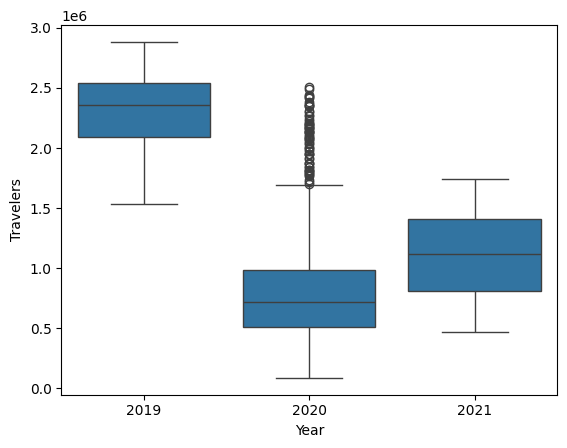

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("data/tsa_melted_holiday_travel.csv")
sns.boxplot(data=df, x='year', y='travelers')
plt.xlabel('Year')
plt.ylabel('Travelers')

plt.show()



<!-- @q -->
## Problem 7
Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       864 non-null    datetime64[ns]
 1   year       864 non-null    int64         
 2   travelers  864 non-null    float64       
 3   holiday    54 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 27.1+ KB


Text(0.5, 1.0, '2019 TSA Median Traveler Throughput')

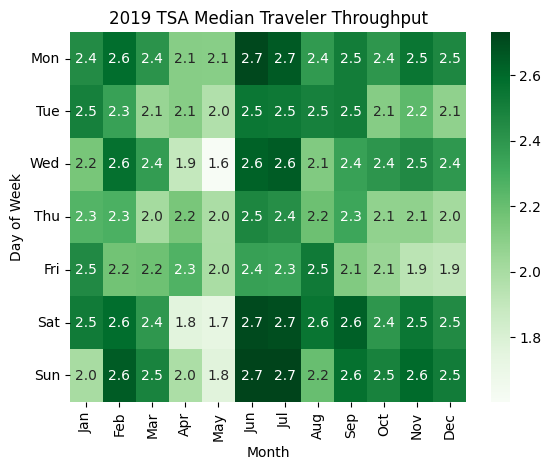

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

df.info() 

df = pd.read_csv("data/tsa_melted_holiday_travel.csv")
df['date'] = pd.to_datetime(df['date'])

df_2019 = df[df['date'].dt.year == 2019].copy()

df_2019['Month'] = df_2019['date'].dt.month_name()
df_2019['Day of Week'] = df_2019['date'].dt.day_name()

heatmap_data = pd.pivot_table(
    df_2019,
    values='travelers',  
    index='Day of Week',  
    columns='Month',      
    aggfunc='median'      
)
ax = sns.heatmap(data= heatmap_data / 1e6, annot=True, fmt='.1f', cmap='Greens')
ax.set_xticklabels(calendar.month_abbr[1:])
ax.set_yticklabels(calendar.day_abbr, rotation=0)
ax.set_title('2019 TSA Median Traveler ')

